# (6주차) 10월19일
> 드랍아웃, fastai를 이용한 학습, CPU vs GPU

- toc:true
- branch: master
- badges: true
- comments: true
- author: 윤도현

In [1]:
import torch 
import matplotlib.pyplot as plt 

In [2]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [9]:
torch.linspace?

Docstring:
linspace(start, end, steps, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Creates a one-dimensional tensor of size :attr:`steps` whose values are evenly
spaced from :attr:`start` to :attr:`end`, inclusive. That is, the value are:

.. math::
    (\text{start},
    \text{start} + \frac{\text{end} - \text{start}}{\text{steps} - 1},
    \ldots,
    \text{start} + (\text{steps} - 2) * \frac{\text{end} - \text{start}}{\text{steps} - 1},
    \text{end})


.. warning::
    Not providing a value for :attr:`steps` is deprecated. For backwards
    compatibility, not providing a value for :attr:`steps` will create a tensor
    with 100 elements. Note that this behavior is not reflected in the
    documented function signature and should not be relied on. In a future
    PyTorch release, failing to provide a value for :attr:`steps` will throw a
    runtime error.

Args:
    start (float): the starting value for the set of points
    end (floa

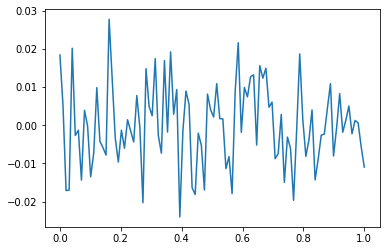

In [3]:
plt.plot(X,y)

### 네트워크 설정, 옵티마이저, 손실함수

In [16]:
torch.manual_seed(1) #초기 가중치 똑같이
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1))
optimizer=torch.optim.Adam(net.parameters())
loss_fn = torch.nn.MSELoss()

### 모형 학습

In [5]:
for epoc in range(1000):
    ##1 
    yhat=net(X)
    ##2
    loss=loss_fn(yhat,y)
    ##3
    loss.backward()
    ##4
    optimizer.step()
    net.zero_grad()

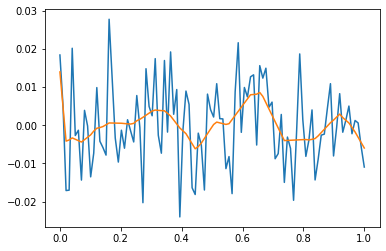

In [8]:
plt.plot(X,y)
plt.plot(X,yhat.data)

### train / validation

In [21]:
X1 = X[:80]
y1 = y[:80]
X2 = X[80:]
y2 = y[80:]

### 네트워크 설정, 옵티마이저, 손실함수

In [23]:
torch.manual_seed(1) #초기 가중치 똑같이
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1))
optimizer=torch.optim.Adam(net.parameters())
loss_fn = torch.nn.MSELoss()

In [24]:
for epoc in range(1000):
    ##1 
    y1hat=net(X1)
    ##2
    loss=loss_fn(y1hat,y1)
    ##3
    loss.backward()
    ##4
    optimizer.step()
    net.zero_grad()

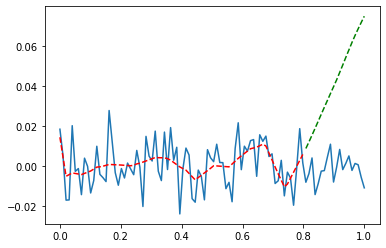

In [29]:
plt.plot(X,y)
plt.plot(X1,net(X1).data,'--r')
plt.plot(X2,net(X2).data,'--g')

### 드랍아웃

In [30]:
X1 = X[:80]
y1 = y[:80]
X2 = X[80:]
y2 = y[80:]

In [32]:
torch.manual_seed(1) #초기 가중치 똑같이
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512,out_features=1))
optimizer=torch.optim.Adam(net.parameters())
loss_fn = torch.nn.MSELoss()

In [33]:
for epoc in range(1000):
    ##1 
    y1hat=net(X1)
    ##2
    loss=loss_fn(y1hat,y1)
    ##3
    loss.backward()
    ##4
    optimizer.step()
    net.zero_grad()

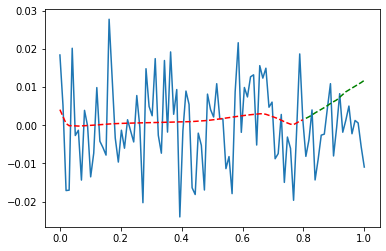

In [36]:
net.eval()          #### 네트워크를 평가모드로 전환
plt.plot(X,y)
plt.plot(X1,net(X1).data,'--r')
plt.plot(X2,net(X2).data,'--g')

# validation data를 잘맞추는 모델이 더 좋은 모델이다!!!!!!!!!
# 따라서 드랍아웃 모델이 더 좋은 모델이다

### 학습과정 비교

`-` 데이터 생성

In [79]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1) 
y=torch.randn(100).reshape(100,1)

`-` tr/val 분리

In [80]:
X_tr=X[:80]
y_tr=y[:80]
X_val=X[80:]
y_val=y[80:] 

`-` 네트워크, 옵티마이저, 손실함수

- 기본 네트워크(net1), 드랍아웃 적용한 네트워크(net2)
- 대응하는 옵티마이저 1,2 설정
- 손실함수

In [81]:
torch.manual_seed(1) 
net1=torch.nn.Sequential(
    torch.nn.Linear(1,512), 
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)) 
optimizer_net1 = torch.optim.Adam(net1.parameters()) 
net2=torch.nn.Sequential(
    torch.nn.Linear(1,512), 
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(512,1)) 
optimizer_net2 = torch.optim.Adam(net2.parameters())
loss_fn=torch.nn.MSELoss()

In [82]:
tr_loss_net1=[] 
val_loss_net1=[]
tr_loss_net2=[] 
val_loss_net2=[] 

`-` net1 

In [83]:
for epoc in range(1000): 
    ## 1 
    yhat_tr_net1 = net1(X_tr) 
    ## 2 
    loss_tr = loss_fn(yhat_tr_net1, y_tr) 
    ## 3 
    loss_tr.backward() 
    ## 4 
    optimizer_net1.step()
    net1.zero_grad() 
    ## 5 기록 
    ### tr 
    tr_loss_net1.append(loss_tr.item())
    
    ### val 
    yhat_val_net1 = net1(X_val) 
    loss_val = loss_fn(yhat_val_net1,y_val) 
    val_loss_net1.append(loss_val.item())

`-` net2

In [84]:
for epoc in range(1000):
    ## 1
    yhat_tr_net2= net2(X_tr)
    ## 2
    loss_tr = loss_fn(yhat_tr_net2,y_tr)
    ## 3
    loss_tr.backward()
    ## 4
    optimizer_net2.step()
    net1.zero_grad()
    ##5 기록
    ### tr
    net2.eval()
    tr_loss_net2.append(loss_tr.item())
    ###val
    yhat_val_net2 = net2(X_val)
    loss_val = loss_fn(yhat_val_net2,y_val)
    val_loss_net2.append(loss_val.item())
    net2.train()


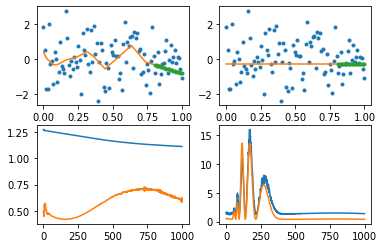

In [85]:
net2.eval()
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(X,y,'.'); ax1.plot(X_tr,net1(X_tr).data); ax1.plot(X_val,net1(X_val).data,'.');
ax2.plot(X,y,'.'); ax2.plot(X_tr,net2(X_tr).data); ax2.plot(X_val,net2(X_val).data,'.');
ax3.plot(tr_loss_net1); ax3.plot(val_loss_net1);
ax4.plot(tr_loss_net2); ax4.plot(val_loss_net2);

`-` 다 좋은데 코드를 짜는것이 너무 힘들다. 

- 생각해보니까 미니배치도 만들어야 함 + 미니배치를 나눈상태에서 GPU 메모리에 파라메터도 올려야함. 
- 조기종료와 같은 기능도 구현해야함 + 기타등등을 구현해야함. 
- 나중에는 학습률을 서로 다르게 돌려가며 결과도 기록해야함 $\to$ 그래야 좋은 학습률 선택가능 
- for문안에 step1~step4를 넣는것도 너무 반복작업임. 
- 등등.. 

`-` 위와 같은 것들의 특징: 머리로 상상하기는 쉽지만 실제 구현하는 것은 까다롭다. 

`-` 사실 우리가 하고싶은것 

- **아키텍처를 설계**: 데이터를 보고 맞춰서 설계해야할 때가 많음 (우리가 해야한다) 
- 손실함수: 통계학과 교수님들이 연구하심 
- 옵티마이저: 산공교수님들이 연구하심 

`-` 제 생각 

- 기업의욕심: real-data를 분석하는 딥러닝 아키텍처 설계 $\to$ 아키텍처별로 결과를 관찰 (편하게) $\Longrightarrow$ fastai + real data 
- 학생의욕심: 그러면서도 모형이 돌아가는 원리는 아주 세밀하게 알고싶음 $\Longrightarrow$ pytorch + toy example (regression 등을 위주로) 
- 연구자의욕심: 기존의 모형을 조금 변경해서 쓰고싶음 $\Longrightarrow$ (pytorch +fastai) + any data 

`-` **tensorflow + keras** vs **pytorch + fastai** 

### pytorch + fastai 

`-` 데이터셋을 만든다. 

In [86]:
X_tr=X[:80]
y_tr=y[:80]
X_val=X[80:]
y_val=y[80:]

In [87]:
ds1= torch.utils.data.TensorDataset(X_tr,y_tr)
ds2= torch.utils.data.TensorDataset(X_val,y_val)

`-` 데이터 로더를 만든다.

In [88]:
dl1 = torch.utils.data.DataLoader(ds1,batch_size=80)
dl2 = torch.utils.data.DataLoader(ds2,batch_size=20)

`-` 데이터로더스를 만든다.

In [90]:
from fastai.vision.all import *

In [91]:
dls = DataLoaders(dl1,dl2)

### 드랍아웃 제외버전

`-` 네트워크 설계 (드랍아웃 제외)

In [93]:
torch.manual_seed(1)
net_fastai = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=512),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1))
#optimizer = torch.optim.Adam()
loss_fn = torch.nn.MSELoss()

`-` 러너오브젝트 (for문 대신 돌려주는 오브젝트)

In [94]:
Learner?

Init signature:
Learner(
    dls,
    model,
    loss_func=None,
    opt_func=<function Adam at 0x000002365FC28D30>,
    lr=0.001,
    splitter=<function trainable_params at 0x000002365E8BE9D0>,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Docstring:      Group together a `model`, some `dls` and a `loss_func` to handle training
File:           c:\users\user\anaconda3\envs\bda2021\lib\site-packages\fastai\learner.py
Type:           type
Subclasses:     


In [95]:
lrnr = Learner(dls,net_fastai,opt_func=Adam, loss_func=loss_fn)

`-` 에폭만 설정하고 바로 학습

In [96]:
lrnr.fit(1000)

epoch,train_loss,valid_loss,time
0,1.277154,0.491255,00:01
1,1.277137,0.455254,00:00
2,1.275098,0.444348,00:00
3,1.274419,0.465840,00:00
4,1.273425,0.507345,00:00
5,1.272413,0.547977,00:00
6,1.271832,0.561115,00:00
7,1.271369,0.549273,00:00
8,1.270849,0.530361,00:00
9,1.270432,0.520739,00:00


`-` loss들도 에폭별로 기록되어 있음

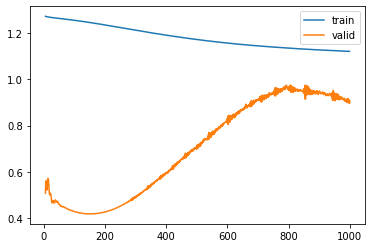

In [97]:
lrnr.recorder.plot_loss()

`-` net_fastai에도 파라미터가 업데이트 되어있음

In [99]:
list(net_fastai.parameters())

[Parameter containing:
 tensor([[ 0.5101],
         [-0.4446],
         [-0.2024],
         [ 0.4647],
         [-0.9321],
         [ 0.5937],
         [-0.2037],
         [ 0.5092],
         [ 0.1376],
         [-0.1212],
         [ 0.2670],
         [ 0.0488],
         [ 0.3616],
         [-0.3858],
         [-0.0684],
         [-0.2035],
         [ 0.1435],
         [-0.0040],
         [ 0.8716],
         [ 0.3012],
         [-0.3775],
         [-0.8454],
         [-0.1659],
         [-0.4270],
         [-0.3216],
         [ 0.2324],
         [ 0.5902],
         [ 0.5435],
         [-1.2585],
         [ 0.6137],
         [ 0.2766],
         [ 1.1680],
         [ 0.6535],
         [-1.0191],
         [-0.9413],
         [-0.4857],
         [ 1.1045],
         [-0.1733],
         [ 0.4304],
         [-0.4601],
         [ 0.9772],
         [-0.4189],
         [ 1.0261],
         [ 0.0161],
         [-0.5173],
         [ 0.5089],
         [-0.5255],
         [ 0.2912],
         [-0.2859

- 리스트를 확인해보면 net_fastai 의 파라미터가 알아서 GPU로 옮겨져서 학습됨.

`-` 플랏

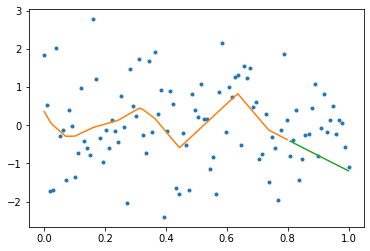

In [103]:
net_fastai.to("cpu")
plt.plot(X,y,'.')
plt.plot(X_tr,net_fastai(X_tr).data)
plt.plot(X_val,net_fastai(X_val).data)

### 드랍아웃 추가버전

`-` 네트워크 설계 (드랍아웃 추가)

In [104]:
torch.manual_seed(1)
net_fastai = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512,out_features=1))
#optimizer = torch.optim.Adam()
loss_fn = torch.nn.MSELoss()

`-` 러너오브젝트 (for문 대신 돌려주는 오브젝트)

In [105]:
Learner?

Init signature:
Learner(
    dls,
    model,
    loss_func=None,
    opt_func=<function Adam at 0x000002365FC28D30>,
    lr=0.001,
    splitter=<function trainable_params at 0x000002365E8BE9D0>,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
)
Docstring:      Group together a `model`, some `dls` and a `loss_func` to handle training
File:           c:\users\user\anaconda3\envs\bda2021\lib\site-packages\fastai\learner.py
Type:           type
Subclasses:     


In [106]:
lrnr = Learner(dls,net_fastai,opt_func=Adam, loss_func=loss_fn)

`-` 에폭만 설정하고 바로 학습

In [107]:
lrnr.fit(1000)

epoch,train_loss,valid_loss,time
0,1.585671,0.428895,00:00
1,1.552302,0.434828,00:00
2,1.568768,0.442796,00:00
3,1.543477,0.449613,00:00
4,1.562545,0.456714,00:00
5,1.523569,0.459948,00:00
6,1.506777,0.458101,00:00
7,1.510378,0.455332,00:00
8,1.532578,0.449036,00:00
9,1.528131,0.445395,00:00


`-` loss들도 에폭별로 기록되어 있음

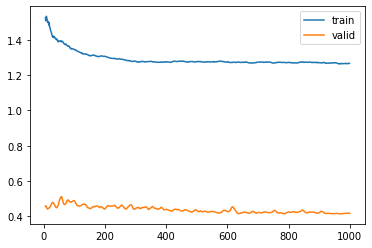

In [108]:
lrnr.recorder.plot_loss()

`-` net_fastai에도 파라미터가 업데이트 되어있음

In [109]:
list(net_fastai.parameters())

[Parameter containing:
 tensor([[ 5.1013e-01],
         [-4.8223e-01],
         [-2.3769e-01],
         [ 4.6469e-01],
         [-9.3205e-01],
         [ 5.9374e-01],
         [-2.0368e-01],
         [ 4.5196e-01],
         [ 1.3763e-01],
         [-1.2122e-01],
         [ 2.2299e-01],
         [ 4.8840e-02],
         [ 3.6159e-01],
         [-3.8582e-01],
         [-1.4774e-01],
         [-1.1796e-01],
         [ 1.4350e-01],
         [-3.9550e-03],
         [ 7.9797e-01],
         [ 2.5765e-01],
         [-4.1782e-01],
         [-6.4282e-01],
         [-1.6594e-01],
         [-4.2704e-01],
         [-3.8846e-01],
         [ 5.7891e-02],
         [ 5.9019e-01],
         [ 4.4405e-01],
         [-1.0521e+00],
         [ 6.1374e-01],
         [ 2.7658e-01],
         [ 8.9415e-01],
         [ 6.5348e-01],
         [-9.4206e-01],
         [-9.4134e-01],
         [-5.2691e-01],
         [ 8.8248e-01],
         [-2.3506e-01],
         [ 3.7040e-01],
         [-4.6008e-01],
         [ 8.7157

- 리스트를 확인해보면 net_fastai 의 파라미터가 알아서 GPU로 옮겨져서 학습됨.

`-` 플랏

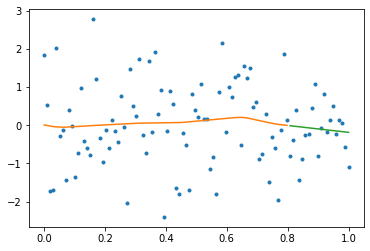

In [110]:
net_fastai.to("cpu")
plt.plot(X,y,'.')
plt.plot(X_tr,net_fastai(X_tr).data)
plt.plot(X_val,net_fastai(X_val).data)

# CPU vs GPU 시간비교

In [111]:
import time

#### CPU (512) 

In [112]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [113]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [114]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [115]:
t2-t1

0.5515086650848389

#### GPU (512) 

In [116]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [117]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [118]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [119]:
t2-t1

0.7383894920349121

`-` ?? CPU가 더 빠르다!!

#### CPU (20480) 

In [120]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [121]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=20480), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=20480,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [122]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [123]:
t2-t1

12.192155361175537

#### GPU (20480) 

In [124]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [125]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=20480), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=20480,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [126]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [127]:
t2-t1

1.498152494430542

#### CPU (204800) 

In [128]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [129]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=204800), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=204800,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [130]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [131]:
t2-t1

106.118088722229

#### GPU (204800) 

In [132]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [133]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=204800), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=204800,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [134]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [135]:
t2-t1

13.321634292602539

### 숙제 

`-` 현재 작업하고 있는 컴퓨터에서 아래코드를 실행후 시간을 출력하여 스샷제출 

#### CPU (512) 

In [136]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [137]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [138]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [139]:
t2-t1

0.550506591796875

#### GPU (512) 

In [140]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [141]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [142]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [143]:
t2-t1

0.743750810623169